In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

#/content/gdrive/MyDrive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory

# %cd /content/gdrive/MyDrive/kaggle

#Check the present working directory using pwd command

In [ ]:
# !kaggle datasets download -d emmarex/plantdisease

In [ ]:
# !ls

In [ ]:
#unzipping the zip files and deleting the zip files

# !unzip \*.zip  #&& rm *.zip

In [ ]:
# !pip install split-folders

In [ ]:
#import splitfolders
#splitfolders.ratio('/content/gdrive/MyDrive/kaggle/PlantVillage', output='/content/gdrive/MyDrive/kaggle/split_dataset_2', seed=10, ratio=(.8, .2), group_prefix=None)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
folder_path = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train'
#Define image parameters for batch generator
# images in this dataset are already sized 256x256
img_size = 256
#img_depth = 1

In [ ]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)  

In [ ]:
# training generator
train_generator = img_generator.flow_from_directory(folder_path,
                                                    target_size=(img_size, img_size),
                                                    color_mode='rgb', 
                                                    subset='training',
                                                    batch_size=30)

Found 13767 images belonging to 15 classes.


In [ ]:
# test generator
test_generator = img_generator.flow_from_directory(folder_path,
                                                    target_size=(img_size, img_size),
                                                    color_mode='rgb', 
                                                    subset='validation',
                                                    batch_size=30)

Found 3437 images belonging to 15 classes.


In [ ]:
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (30, 256, 256, 3)
Actual labels shape (30, 15)


In [ ]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

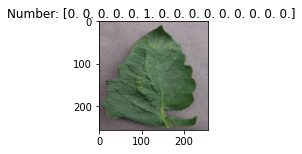

In [ ]:
#Let's plot an image and see

img_num = np.random.randint(0, X.shape[0]) #Get a random integer between 0 and number of examples in test dataset
#print(img_num)
plt.figure(figsize=(2,2)) #display size
plt.imshow(X[img_num].astype('uint8')) #Show the image from test dataset, uint8 give in format 0 to 255
plt.suptitle('Number: ' + str(y[img_num]))
plt.show()

# CNN Model 

In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size, img_size,3)))

#First conv layer
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same',activation='relu'))
#256,256,16

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#128,128,16

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Second conv layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'))
#128,128,32

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#64,64,32

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Third conv layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))
#64,64,64

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#32,32,64

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Fourth conv layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'))
#32,32,128

#Maxpool
#16,16,128
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Fifth conv layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))
#16,16,256

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#8,8,256

#Sixth conv layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))
#8,8,256

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#4,4,256

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
### too many trainable params (16777216)

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Dense(256, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

### output layer softmax or SVM ?
#Add Output Layer
model.add(tf.keras.layers.Dense(15, activation='softmax'))

In [ ]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        1

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('az_rgb_pvd.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
model.fit(train_generator,
          epochs=200,
          steps_per_epoch= 13207//30,  #Number of batches per epoch 3743
          validation_data=test_generator,
          validation_steps = 3297//30, #933
          callbacks=[model_checkpoint]) #Number of test images//batch_size

Epoch 1/200
 45/440 [==>...........................] - ETA: 1:07:11 - loss: 2.7313 - accuracy: 0.2467

## Testing accuracy

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/A_P/Project_prankur/plant_village_dataset/az_rgb_pvd.h5')   #validation split=0.2 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_folder_path = '/content/gdrive/MyDrive/kaggle/split_dataset_2/val'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()


In [ ]:
img_size = 256
final_test_generator = test_datagen.flow_from_directory(test_folder_path,
                                                    target_size=(img_size, img_size),
                                                    color_mode='rgb', 
                                                    batch_size=30, shuffle=False)

Found 4134 images belonging to 15 classes.


In [ ]:
preds = model.predict(final_test_generator) 

In [ ]:
preds_cls_idx = preds.argmax(axis=-1) 

In [ ]:
preds_cls_idx 

array([ 9,  0,  0, ..., 14, 14, 14])

In [ ]:
preds_cls_idx #precited, har baar alag alag 
print('dtype is :',preds_cls_idx.dtype)

dtype is : int64


In [ ]:
# preds_cls_idx.shape
# arr = arr.astype('float64')
preds_cls_idx = preds_cls_idx.astype('int32')
print('dtype is :',preds_cls_idx.dtype)

dtype is : int32


In [ ]:
test_labels= final_test_generator.labels #actual 
len(test_labels)

4134

In [ ]:
test_labels #actual 
print('type is :', test_labels.dtype)

type is : int32


In [ ]:
test_labels= final_test_generator.labels 
len(test_labels)

4134

In [ ]:
test_labels #actual 
# y_labels = np.argmax(test_labels, axis=1)

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, preds_cls_idx))

0.9615384615384616


### Plot ROC

In [ ]:
# make the predictions and actual labels binary (one hot encoding)

from sklearn.preprocessing import label_binarize

classes = np.unique(test_labels)
B_test_labels = label_binarize(test_labels, classes= classes )
B_preds_cls_idx = label_binarize(preds_cls_idx, classes= classes )
n_classes = B_test_labels.shape[1]


In [ ]:
# calculate ROC and AUC
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()  #False positive rate
tpr = dict()  #True positive rate

roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(B_test_labels[:, i], B_preds_cls_idx[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  #area under curve

# Compute macro-average ROC curve and ROC area since multiclass, so macro
### also compute weighted macro average and plot different ROC.
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += numpy.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


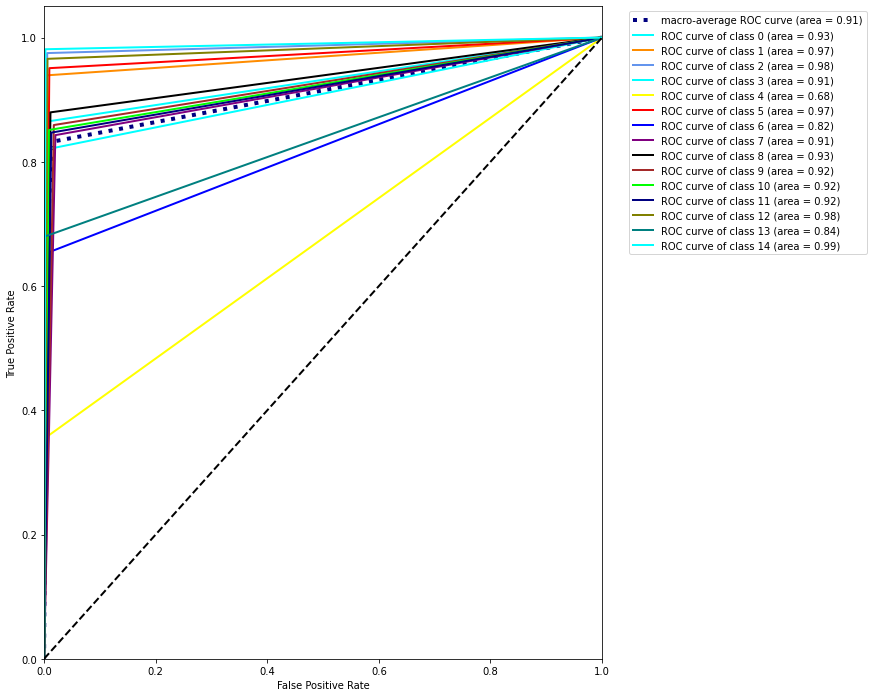

In [ ]:
# Plot all ROC curves

# Plot linewidth.
lw = 2

plt.figure(1, figsize= (10,12) )
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','cyan','yellow', 'red', 'blue', 'purple', 'maroon', 'brown', 'lime', 'navy', 'olive', 'teal' ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper right")
plt.show()

## Visualize feature maps 



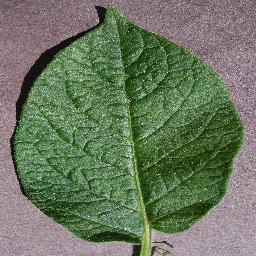

In [ ]:
## Sample image
image_path = '/content/gdrive/MyDrive/kaggle/split_dataset_2/val/Potato___healthy/046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG'
img = tf.keras.preprocessing.image.load_img(image_path, target_size = (256, 256), color_mode='rgb')
img

In [ ]:
from keras.preprocessing import image
import numpy as np

image_path = '/content/gdrive/MyDrive/kaggle/split_dataset_2/val/Potato___healthy/046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG'

# Pre-processing the image
img = image.load_img(image_path, target_size = (256, 256), color_mode='rgb')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

# Print image tensor shape
print(img_tensor.shape)


(1, 256, 256, 3)


In [ ]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

16


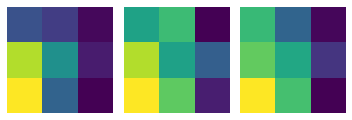

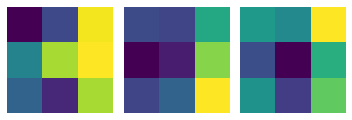

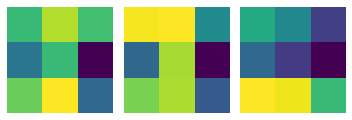

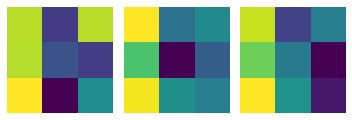

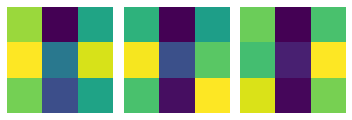

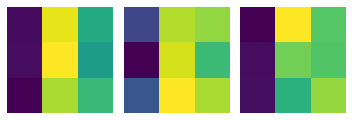

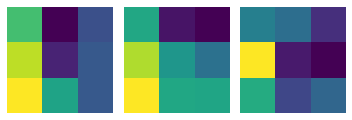

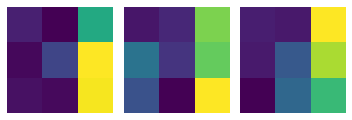

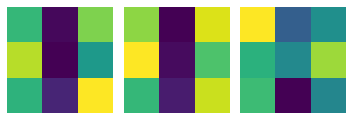

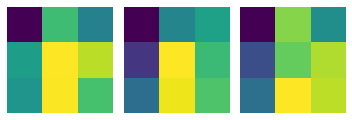

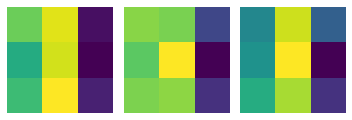

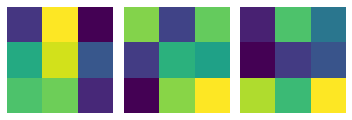

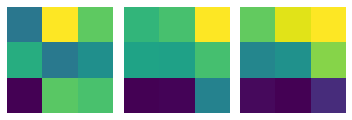

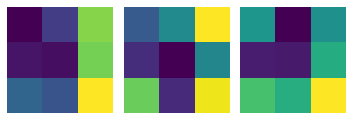

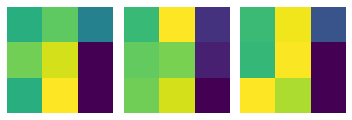

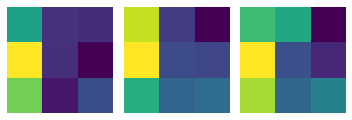

32


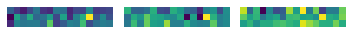

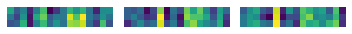

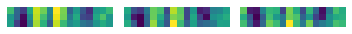

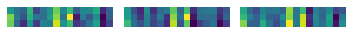

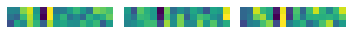

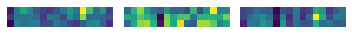

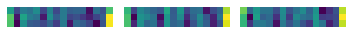

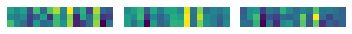

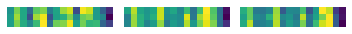

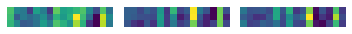

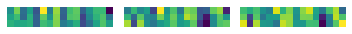

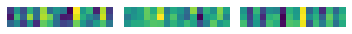

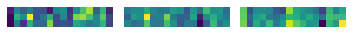

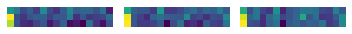

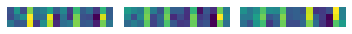

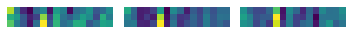

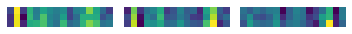

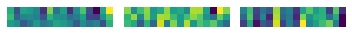

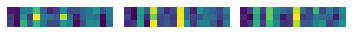

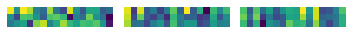

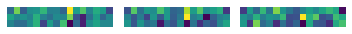

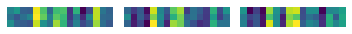

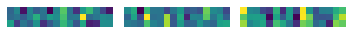

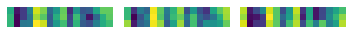

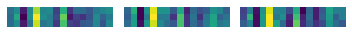

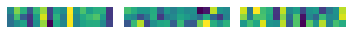

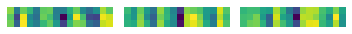

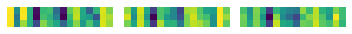

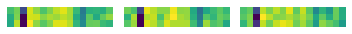

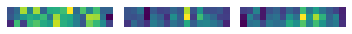

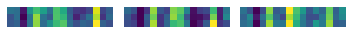

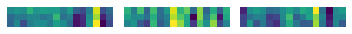

64


128


256


256


In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers if 'conv' in layer.name])

for layer_key in layer_dict:

  # Grab the filters and biases for that layer
  filters, biases = layer_dict[layer_key].get_weights()

  # Normalize filter values to a range of 0 to 1 so we can visualize them
  f_min, f_max = np.amin(filters), np.amax(filters)
  filters = (filters - f_min) / (f_max - f_min)

  print(filters.shape[3])
  axis_x=1
  #plotting all the filters
  for i in range(filters.shape[3]):
  #for i in range(6):
      #get the filters
      filt=filters[:,:,:, i]
      plotFilters(filt)

In [ ]:
img_path = '/content/gdrive/MyDrive/kaggle/split_dataset_2/val/Potato___healthy/046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG'

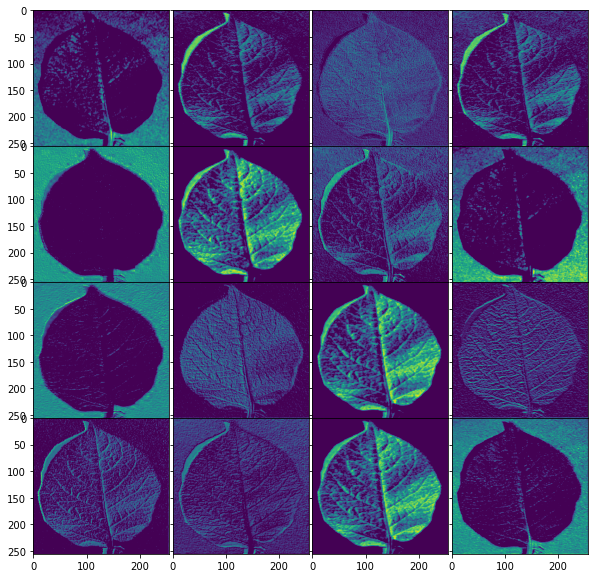

In [ ]:
from keras.models import Model
layer_dict = dict([(layer.name, layer) for layer in model.layers if 'conv' in layer.name])

# Perpare the image
image = tf.keras.preprocessing.image.load_img(img_path, target_size = (256, 256), color_mode='rgb')
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
# image = preprocess_input(image)

# Visualize feature maps of first convolutional layer
curr_model = Model(inputs=model.inputs, outputs=layer_dict['conv2d'].output)

# Apply the model to the image
feature_maps = curr_model.predict(image)

figs, axes = plt.subplots(nrows=4, ncols=4,figsize=(10,10), facecolor='w', gridspec_kw = {'wspace':0, 'hspace':0}, sharex=True, sharey=True)
axes_list = [item for sublist in axes for item in sublist]

for i in range(feature_maps.shape[3]):

    axs = axes_list.pop(0) # gca
    axs.imshow(feature_maps[0, :, :, i], cmap='viridis')



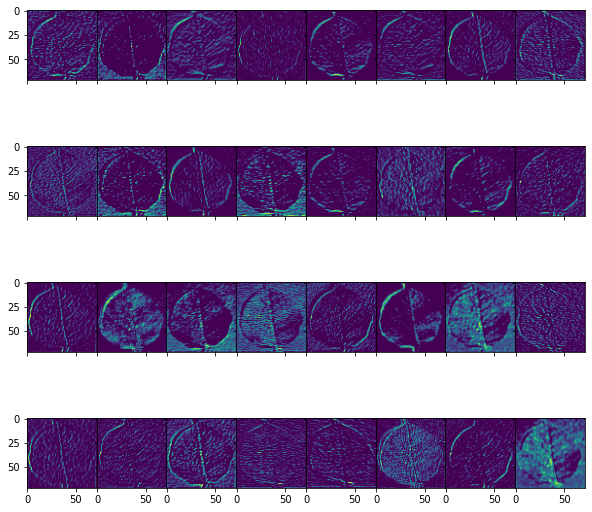

In [ ]:
# Visualize feature maps of second convolutional layer
curr_model = Model(inputs=model.inputs, outputs=layer_dict['conv2d_1'].output)

# Apply the model to the image
feature_maps = curr_model.predict(image)

figs, axes = plt.subplots(nrows=4, ncols=8,figsize=(10,10), facecolor='w', gridspec_kw = {'wspace':0, 'hspace':0}, sharex=True, sharey=True)
axes_list = [item for sublist in axes for item in sublist]

for i in range(feature_maps.shape[3]):

    axs = axes_list.pop(0) # gca
    axs.imshow(feature_maps[0, :, :, i], cmap='viridis')

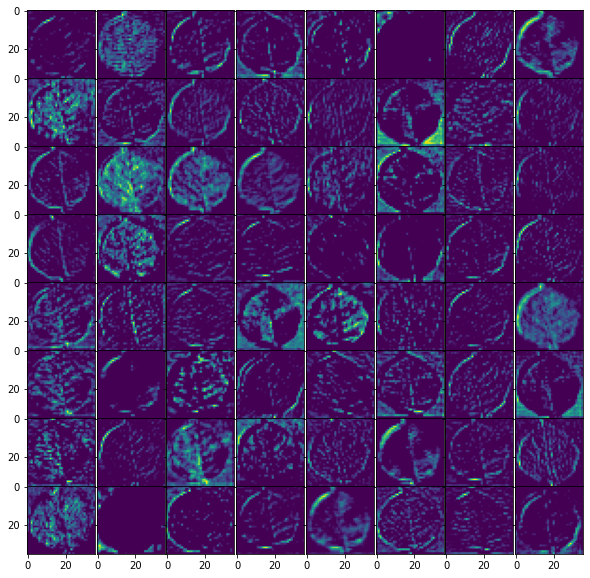

In [ ]:
# Visualize feature maps of third convolutional layer
curr_model = Model(inputs=model.inputs, outputs=layer_dict['conv2d_2'].output)

# Apply the model to the image
feature_maps = curr_model.predict(image)

figs, axes = plt.subplots(nrows=8, ncols=8,figsize=(10,10), facecolor='w', gridspec_kw = {'wspace':0, 'hspace':0}, sharex=True, sharey=True)
axes_list = [item for sublist in axes for item in sublist]

for i in range(feature_maps.shape[3]):

    axs = axes_list.pop(0) # gca
    axs.imshow(feature_maps[0, :, :, i], cmap='viridis')

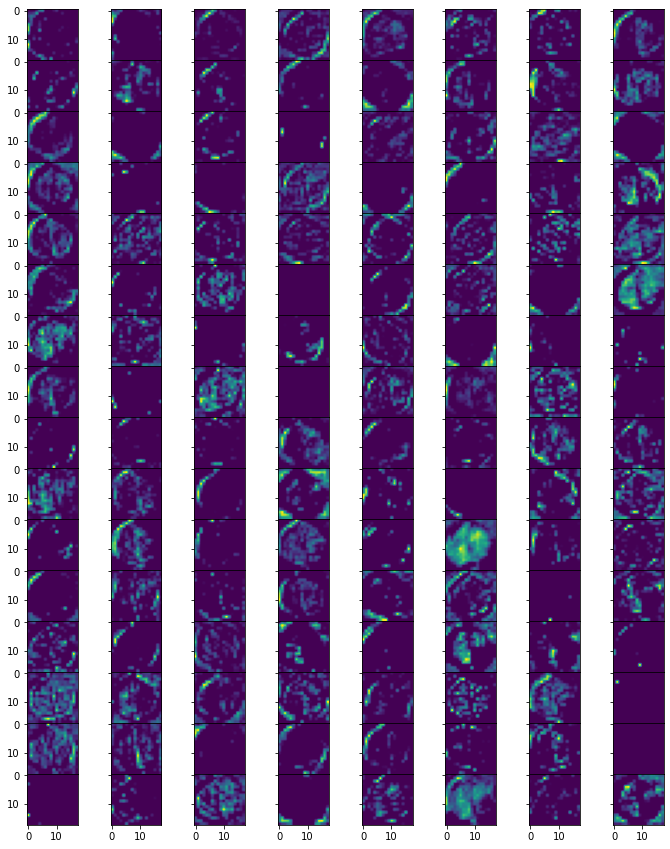

In [ ]:
# Visualize feature maps of fourth convolutional layer
curr_model = Model(inputs=model.inputs, outputs=layer_dict['conv2d_3'].output)

# Apply the model to the image
feature_maps = curr_model.predict(image)

figs, axes = plt.subplots(nrows=16, ncols=8,figsize=(12,15), facecolor='w', gridspec_kw = {'wspace':0, 'hspace':0}, sharex=True, sharey=True)
axes_list = [item for sublist in axes for item in sublist]

for i in range(feature_maps.shape[3]):

    axs = axes_list.pop(0) # gca
    axs.imshow(feature_maps[0, :, :, i], cmap='viridis')

Visualize feature maps of fifth convolutional layer

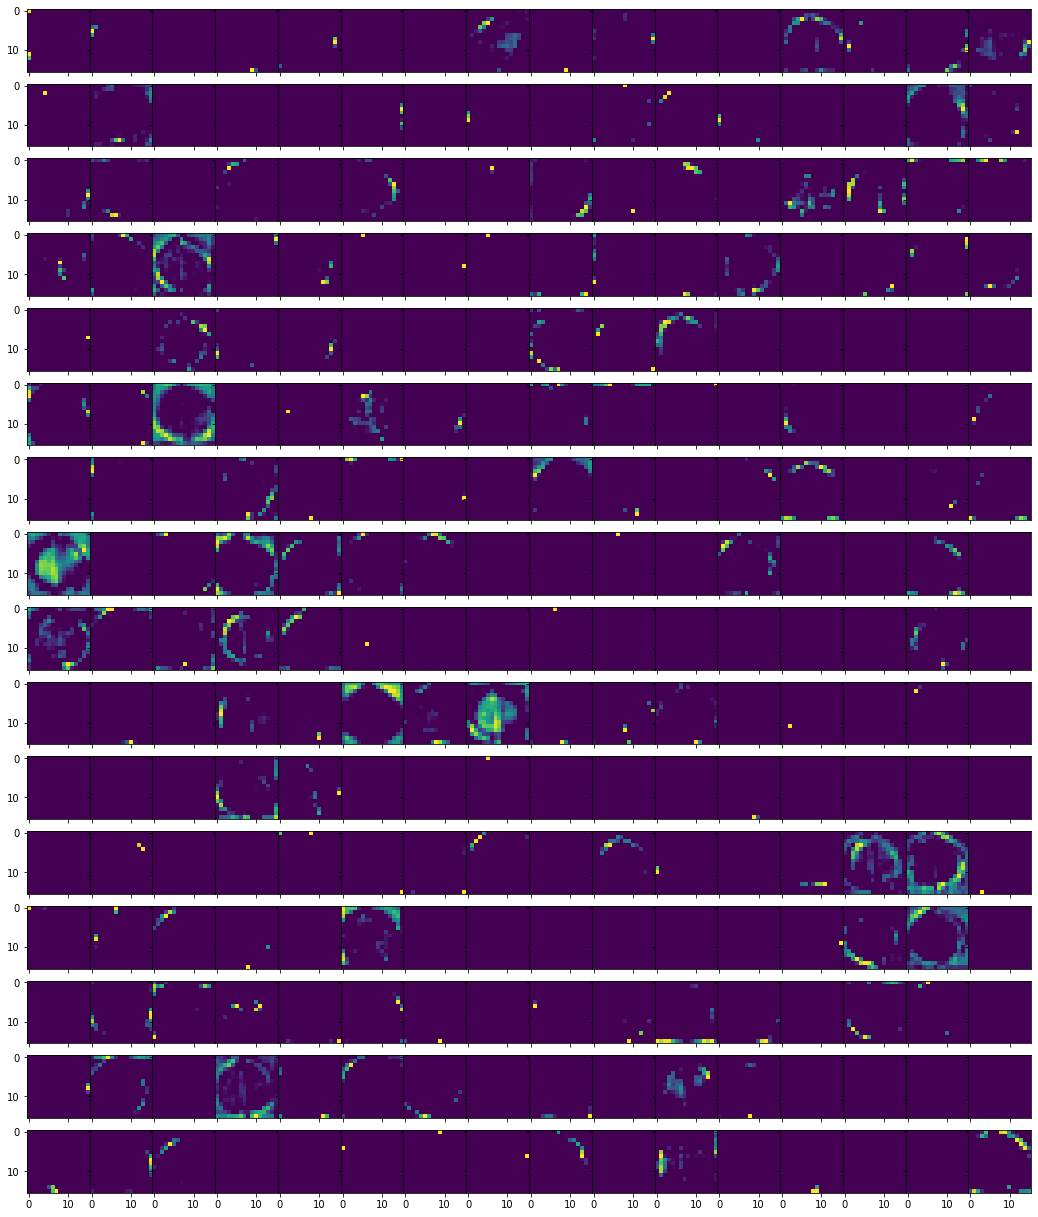

In [ ]:
# Visualize feature maps of fifth convolutional layer
curr_model = Model(inputs=model.inputs, outputs=layer_dict['conv2d_4'].output)

# Apply the model to the image
feature_maps = curr_model.predict(image)

figs, axes = plt.subplots(nrows=16, ncols=16,figsize=(18,22), facecolor='w', gridspec_kw = {'wspace':0, 'hspace':0}, sharex=True, sharey=True)
axes_list = [item for sublist in axes for item in sublist]

for i in range(feature_maps.shape[3]):

    axs = axes_list.pop(0) # gca
    axs.imshow(feature_maps[0, :, :, i], cmap='viridis')

## DATA AUGMENTATION

### Upsample images using image augmentation 

In [ ]:
import os
import shutil

In [ ]:
# first create a copy of the original train dataset
dst = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy'
src = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train'
shutil.copytree(src, dst)

'/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy'

In [ ]:
dirName = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy' # source folder where original images are saved
folders = os.listdir(dirName)
folders[:3]

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight']

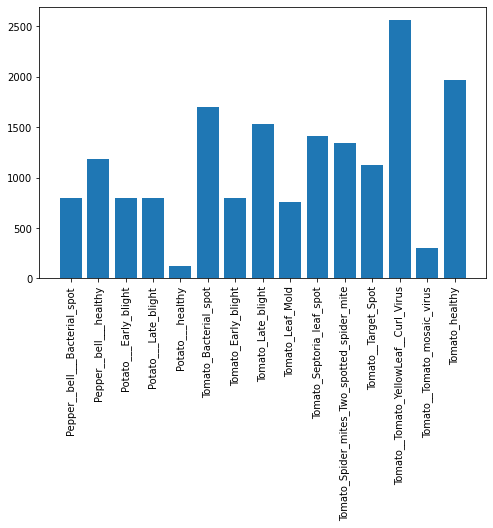

In [ ]:
# Check the imbalance in classes of dataset
import matplotlib.pyplot as plt
find_path = "/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy"
num_files=dict()
for name in folders:
  dirpath = os.path.join(find_path, name)
  num_files[name] = len(os.listdir(dirpath))
_=plt.figure(figsize=(8,5))
_=plt.bar(range(len(num_files)), list(num_files.values()), align='center')
_=plt.xticks(range(len(num_files)), list(num_files.keys()), rotation=90)

In [ ]:
# create target classes in another folder (to save augmented images)
for name in folders:
    os.mkdir('/content/gdrive/MyDrive/kaggle/split_dataset_2/aug_images' +'/' + name)

###### Determine number of images to generate in each folder 

In [ ]:
def rnd_files(dirpath, max_images,label):
    
    import random
    import pandas as pd
    num_files = len(os.listdir(dirpath)) # number of images under the given class
    n = max_images - num_files
    filenames = random.choices(os.listdir(dirpath), k=n)  
    df = pd.DataFrame({'filename': filenames,
                       'label': label})
    return df, n

In [ ]:
# Determine Augmentation + save augmented images under augmented folder
import tensorflow as tf

find_path = "/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy" # source folder where original images are saved
LABELS = folders
max_images = 2570
for label in LABELS:

    print("Current folder:", label)
    path = find_path +'/' + label
    
    df, n = rnd_files(path, max_images,label)
        
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                              brightness_range=[0.3,1.0],
                                                              channel_shift_range=50,
                                                              # rotation_range=20,
                                                              horizontal_flip=True,
                                                              vertical_flip=True,
                                                              # width_shift_range=0.1, height_shift_range=0.1,
                                                              zoom_range=0.1)
    print('Creating augmented images...')

    generator = datagen.flow_from_dataframe(df, x_col='filename', y_col='label', directory=path,
                                            target_size=(256, 256), # color_mode='rgb', 
                                            grayscale=False, seed=10,
                                            save_to_dir= "/content/gdrive/MyDrive/kaggle/split_dataset_2/aug_images" +'/' + label,
                                            save_prefix='00aug_', save_format='JPG',
                                            batch_size=n,
                                            class_mode='input'
                                            )

  # Following line triggers execution of generator
    batch = next(generator) 

Current folder: Pepper__bell___Bacterial_spot
Creating augmented images...
Found 1773 validated image filenames.
Current folder: Pepper__bell___healthy
Creating augmented images...
Found 1388 validated image filenames.
Current folder: Potato___Early_blight
Creating augmented images...
Found 1770 validated image filenames.
Current folder: Potato___Late_blight
Creating augmented images...
Found 1770 validated image filenames.
Current folder: Potato___healthy
Creating augmented images...
Found 2449 validated image filenames.
Current folder: Tomato_Bacterial_spot
Creating augmented images...
Found 869 validated image filenames.
Current folder: Tomato_Early_blight
Creating augmented images...
Found 1770 validated image filenames.
Current folder: Tomato_Late_blight
Creating augmented images...
Found 1043 validated image filenames.
Current folder: Tomato_Leaf_Mold
Creating augmented images...
Found 1809 validated image filenames.
Current folder: Tomato_Septoria_leaf_spot
Creating augmented im

In [ ]:
# To check number of images before merging
dir1 = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy'
dir1_folders = os.listdir(dir1)
img_count = 0
for folder in dir1_folders:
      curr_path = dir1 + '/' + folder
      files = os.listdir(curr_path)
      n = len(files)
      img_count = img_count + n
print("Total images = ", img_count)

Total images =  17205


In [ ]:
# Merge augmented images with original images to create a class balanced dataset

# def folder_merger(f1,f2,path):
import os, shutil 
# dir1 = r'E:\Drive\A_P\Project_prankur\plant_village_dataset\val'
dir1 = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy'
dir1_folders = os.listdir(dir1)
dir2 = '/content/gdrive/MyDrive/kaggle/split_dataset_2/aug_images'
dir1_folders = os.listdir(dir2)

if dir1_folders == dir1_folders:
    print("Folders compatible")

    for folder in dir1_folders:
      curr_path_from = dir2 + '/' + folder
      curr_path_to = dir1 + '/' + folder
      files = os.listdir(curr_path_from)
      print("Merging folders...")
      for f in files:
          # print(curr_path_from + '/' + f)
          shutil.copy(curr_path_from + '/' + f, curr_path_to)

else:
    print("Folders do not match")

print("Done")

Folders compatible
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Merging folders...
Done


In [ ]:
# To check number of images before merging
dir1 = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy'
dir1_folders = os.listdir(dir1)
img_count = 0
for folder in dir1_folders:
      curr_path = dir1 + '/' + folder
      files = os.listdir(curr_path)
      n = len(files)
      img_count = img_count + n
print("Total images = ", img_count)

In [ ]:
# Check the imbalance in classes of dataset
import matplotlib.pyplot as plt
find_path = "/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy"
num_files=dict()
for name in folders:
  dirpath = os.path.join(find_path, name)
  num_files[name] = len(os.listdir(dirpath))
_=plt.figure(figsize=(8,5))
_=plt.bar(range(len(num_files)), list(num_files.values()), align='center')
_=plt.xticks(range(len(num_files)), list(num_files.keys()), rotation=90)

### Train model again on balanced dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
folder_path = '/content/gdrive/MyDrive/kaggle/split_dataset_2/train_copy'
#Define image parameters for batch generator
# images in this dataset are already sized 256x256
img_size = 256
#img_depth = 1

In [ ]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)  

In [ ]:
# training generator
train_generator = img_generator.flow_from_directory(folder_path,
                                                    target_size=(img_size, img_size),
                                                    color_mode='rgb', 
                                                    subset='training',
                                                    batch_size=30)

Found 30840 images belonging to 15 classes.


In [ ]:
# test generator
test_generator = img_generator.flow_from_directory(folder_path,
                                                    target_size=(img_size, img_size),
                                                    color_mode='rgb', 
                                                    subset='validation',
                                                    batch_size=30)

Found 7709 images belonging to 15 classes.


In [ ]:
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (30, 256, 256, 3)
Actual labels shape (30, 15)


In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size, img_size,3)))

#First conv layer
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same',activation='relu'))
#256,256,16

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#128,128,16

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Second conv layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'))
#128,128,32

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#64,64,32

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Third conv layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))
#64,64,64

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#32,32,64

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Fourth conv layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'))
#32,32,128

#Maxpool
#16,16,128
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Fifth conv layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))
#16,16,256

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#8,8,256

#Sixth conv layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))
#8,8,256

#Maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#4,4,256

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
### too many trainable params (16777216)

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Dense(256, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

### output layer softmax or SVM ?
#Add Output Layer
model.add(tf.keras.layers.Dense(15, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        1

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('pr1_balance_rgb_pvd.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
#Specify Loass and Optimizer        
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [ ]:
model.fit(train_generator,
          epochs=200,
          steps_per_epoch= 30840//30,  #Number of batches per epoch 3743
          validation_data=test_generator,
          validation_steps =  7709//30, #933
          callbacks=[model_checkpoint]) #Number of test images//batch_size

Epoch 1/200
440/440 [==============================] - 3601s 8s/step - loss: 5.3843 - accuracy: 0.1539 - val_loss: 2.6337 - val_accuracy: 0.1554

Epoch 00001: val_accuracy improved from -inf to 0.15535, saving model to pvd_4.h5
Epoch 2/200
440/440 [==============================] - 55s 126ms/step - loss: 2.6224 - accuracy: 0.1601 - val_loss: 2.5959 - val_accuracy: 0.1550

Epoch 00002: val_accuracy did not improve from 0.15535
Epoch 3/200
440/440 [==============================] - 55s 125ms/step - loss: 2.5961 - accuracy: 0.1524 - val_loss: 2.5795 - val_accuracy: 0.1560

Epoch 00003: val_accuracy improved from 0.15535 to 0.15596, saving model to pvd_4.h5
Epoch 4/200
440/440 [==============================] - 56s 126ms/step - loss: 2.5925 - accuracy: 0.1518 - val_loss: 2.5719 - val_accuracy: 0.1563

Epoch 00004: val_accuracy improved from 0.15596 to 0.15627, saving model to pvd_4.h5
Epoch 5/200
440/440 [==============================] - 55s 125ms/step - loss: 2.5824 - accuracy: 0.1471 - 

### ROC curves


In [ ]:
# make the predictions and actual labels binary (one hot encoding)

from sklearn.preprocessing import label_binarize

classes = np.unique(test_labels)
B_test_labels = label_binarize(test_labels, classes= classes )
B_preds_cls_idx = label_binarize(preds_cls_idx, classes= classes )
n_classes = B_test_labels.shape[1]


In [ ]:
# calculate ROC and AUC
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()  #False positive rate
tpr = dict()  #True positive rate

roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(B_test_labels[:, i], B_preds_cls_idx[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  #area under curve

# Compute macro-average ROC curve and ROC area since multiclass, so macro
### also compute weighted macro average and plot different ROC.
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += numpy.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


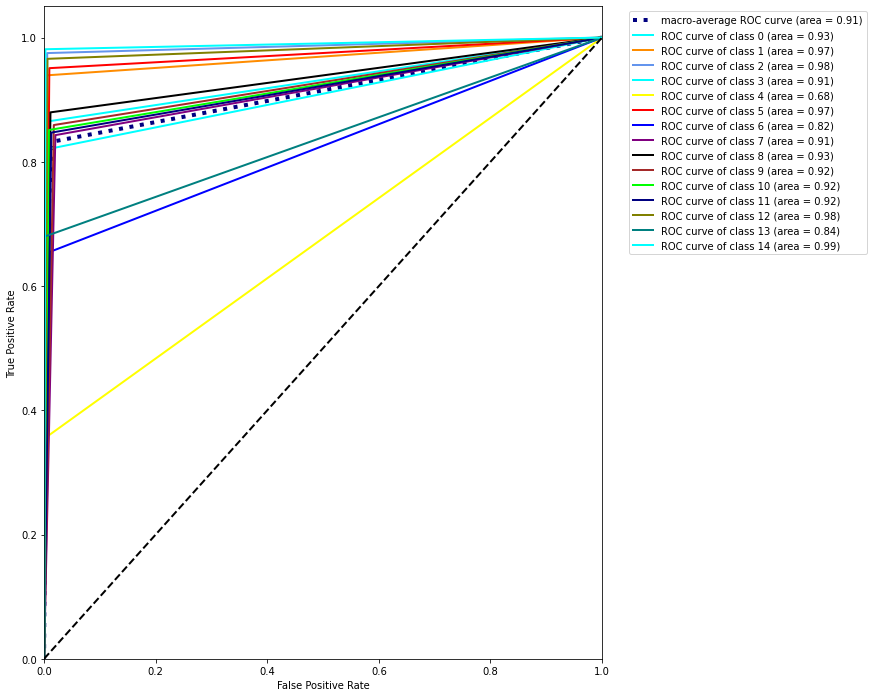

In [ ]:
# Plot all ROC curves

# Plot linewidth.
lw = 2

plt.figure(1, figsize= (10,12) )
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','cyan','yellow', 'red', 'blue', 'purple', 'maroon', 'brown', 'lime', 'navy', 'olive', 'teal' ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper right")
plt.show()